# 1. Unfiltered Data

 # 1.1 Unfiltered Q-Q Transformation including Overestimates

Since this datasets have no defined distribution, we can use a non-parametric approach like quantile-quantile (Q-Q) matching to align the distributions. Here are the steps to achieve this:

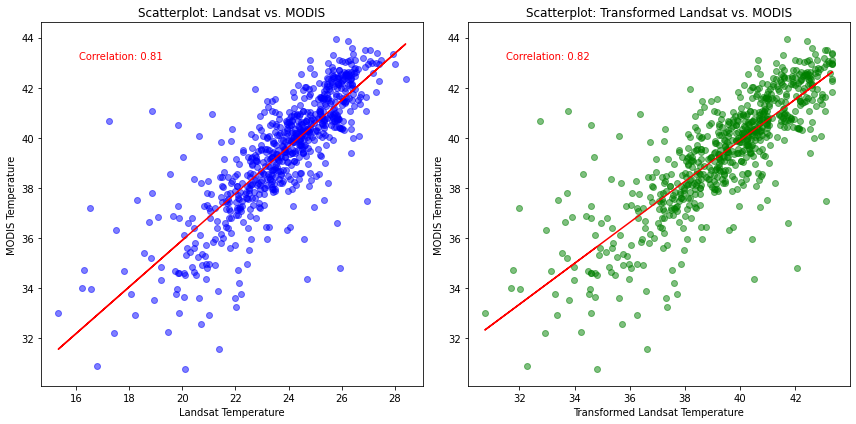

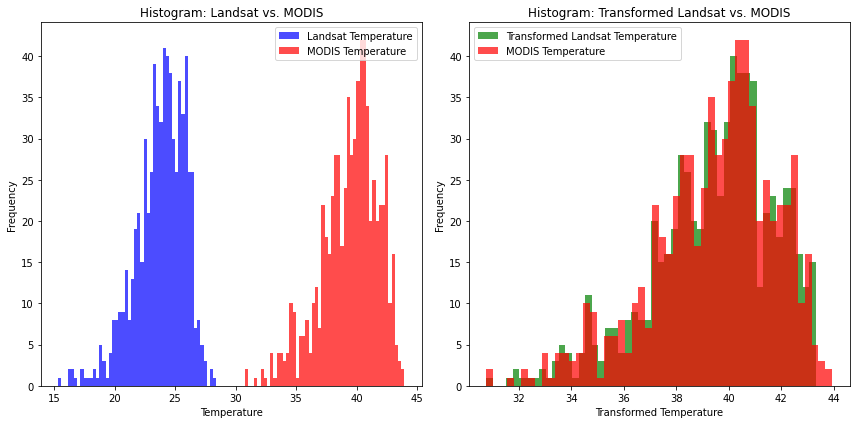

     Landsat_Temperature  Transformed_Landsat_Temperature  MODIS_Temperature
0               25.79457                        41.691471           43.95001
1               26.21630                        42.421637           43.85001
2               26.36911                        42.596444           43.59000
3               26.87753                        43.053945           43.51001
4               27.05068                        43.156430           43.51001
..                   ...                              ...                ...
691             19.47940                        34.244530           32.25000
692             17.42422                        32.914656           32.19000
693             21.38803                        36.626701           31.54999
694             16.79507                        32.263602           30.87000
695             20.11465                        34.801403           30.75000

[696 rows x 3 columns]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the Excel file containing both datasets
xls = pd.ExcelFile(r'C:\Users\Redwan Kabir\Desktop\MOD_LAND_LST2.xlsx')

# Load data from different sheets
landsat_data = xls.parse('Landsat')  # Replace 'Landsat_Sheet' with your Landsat sheet name
modis_lst_data = xls.parse('MODIS')  # Replace 'MODIS_Sheet' with your MODIS LST sheet name

# Calculate quantiles for both datasets
landsat_quantiles = np.percentile(landsat_data['Temperature'], np.arange(0, 100, 1))
modis_lst_quantiles = np.percentile(modis_lst_data['Temperature'], np.arange(0, 100, 1))

# Perform Q-Q matching
landsat_data['Transformed_Temperature'] = np.interp(landsat_data['Temperature'], landsat_quantiles, modis_lst_quantiles)

# Create scatterplot
plt.figure(figsize=(12, 6))

# Scatterplot for Landsat vs. MODIS
plt.subplot(1, 2, 1)
plt.scatter(landsat_data['Temperature'], modis_lst_data['Temperature'], alpha=0.5, color='blue')
plt.title('Scatterplot: Landsat vs. MODIS')
plt.xlabel('Landsat Temperature')
plt.ylabel('MODIS Temperature')

# Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(landsat_data['Temperature'], modis_lst_data['Temperature'])
plt.plot(landsat_data['Temperature'], slope * landsat_data['Temperature'] + intercept, color='red')
plt.text(0.1, 0.9, f'Correlation: {r_value:.2f}', transform=plt.gca().transAxes, color='red')

# Scatterplot for Transformed Landsat vs. MODIS
plt.subplot(1, 2, 2)
plt.scatter(landsat_data['Transformed_Temperature'], modis_lst_data['Temperature'], alpha=0.5, color='green')
plt.title('Scatterplot: Transformed Landsat vs. MODIS')
plt.xlabel('Transformed Landsat Temperature')
plt.ylabel('MODIS Temperature')

# Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(landsat_data['Transformed_Temperature'], modis_lst_data['Temperature'])
plt.plot(landsat_data['Transformed_Temperature'], slope * landsat_data['Transformed_Temperature'] + intercept, color='red')
plt.text(0.1, 0.9, f'Correlation: {r_value:.2f}', transform=plt.gca().transAxes, color='red')

plt.tight_layout()
plt.show()

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for Landsat
plt.subplot(1, 2, 1)
plt.hist(landsat_data['Temperature'], bins=50, color='blue', alpha=0.7, label='Landsat Temperature')
plt.hist(modis_lst_data['Temperature'], bins=50, color='red', alpha=0.7, label='MODIS Temperature')
plt.title('Histogram: Landsat vs. MODIS')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Transformed Landsat
plt.subplot(1, 2, 2)
plt.hist(landsat_data['Transformed_Temperature'], bins=50, color='green', alpha=0.7, label='Transformed Landsat Temperature')
plt.hist(modis_lst_data['Temperature'], bins=50, color='red', alpha=0.7, label='MODIS Temperature')
plt.title('Histogram: Transformed Landsat vs. MODIS')
plt.xlabel('Transformed Temperature')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Combine the three variables into a new DataFrame
combined_data = pd.DataFrame({
    'Landsat_Temperature': landsat_data['Temperature'],
    'Transformed_Landsat_Temperature': landsat_data['Transformed_Temperature'],
    'MODIS_Temperature': modis_lst_data['Temperature']
})

# Display the entire combined dataset
print(combined_data)

# Save filtered combined data to an Excel file
combined_data.to_excel('combined_data.xlsx', index=False)



 # 1.2 Showing summary statistics for each of the variables for comparison: 

In [47]:
# Calculate summary statistics manually
landsat_stats = {
    'Mean': landsat_data['Temperature'].mean(),
    'Standard Deviation': landsat_data['Temperature'].std(),
    'Minimum': landsat_data['Temperature'].min(),
    '25th Percentile': np.percentile(landsat_data['Temperature'], 25),
    'Median (50th Percentile)': np.percentile(landsat_data['Temperature'], 50),
    '75th Percentile': np.percentile(landsat_data['Temperature'], 75),
    'Maximum': landsat_data['Temperature'].max(),
}

MODIS_stats = {
    'Mean': modis_lst_data['Temperature'].mean(),
    'Standard Deviation': modis_lst_data['Temperature'].std(),
    'Minimum': modis_lst_data['Temperature'].min(),
    '25th Percentile': np.percentile(modis_lst_data['Temperature'], 25),
    'Median (50th Percentile)': np.percentile(modis_lst_data['Temperature'], 50),
    '75th Percentile': np.percentile(modis_lst_data['Temperature'], 75),
    'Maximum': modis_lst_data['Temperature'].max(),
}

transformed_stats = {
    'Mean': landsat_data['Transformed_Temperature'].mean(),
    'Standard Deviation': landsat_data['Transformed_Temperature'].std(),
    'Minimum': landsat_data['Transformed_Temperature'].min(),
    '25th Percentile': np.percentile(landsat_data['Transformed_Temperature'], 25),
    'Median (50th Percentile)': np.percentile(landsat_data['Transformed_Temperature'], 50),
    '75th Percentile': np.percentile(landsat_data['Transformed_Temperature'], 75),
    'Maximum': landsat_data['Transformed_Temperature'].max(),
}

# Organize statistics into a DataFrame
statistics_df = pd.DataFrame({
    'Landsat Data': pd.Series(landsat_stats),
    'Transformed Landsat Data': pd.Series(transformed_stats),
    'MODIS Data': pd.Series(MODIS_stats)
    
})

# Display the statistics DataFrame
print(statistics_df)

                          Landsat Data  Transformed Landsat Data  MODIS Data
Mean                         23.785101                 39.432640   39.436781
Standard Deviation            2.059884                  2.359687    2.361726
Minimum                      15.341380                 30.750000   30.750000
25th Percentile              22.626513                 38.109839   38.109990
Median (50th Percentile)     24.091825                 39.830096   39.829990
75th Percentile              25.344318                 41.009170   41.010010
Maximum                      28.402410                 43.330991   43.950010


# 1.3 Download the data in excel format

In [2]:
# Save combined data to an Excel file
combined_data.to_excel('combined_data.xlsx', index=False)
#combined_data.describe().to_excel('combined_statistics.xlsx', sheet_name='Statistics')

NameError: name 'combined_data' is not defined

# 2. Filtered Data

# 2.1. Data Filter using Threshold Values to exclude overestimates

To remove the overestimated data points when comparing the transformed Landsat data with the MODIS LST dataset, you can establish a threshold or criteria for what you consider an acceptable match. For example, you could exclude data points where the difference between Landsat and MODIS LST exceeds a certain value. 
In this code, we introduce a threshold (in this case, set to 2.0) that determines which data points are considered overestimated. Data points with differences exceeding the threshold are filtered out and not included in the visualizations. Adjust the threshold value as needed for your specific analysis. The filtered data is then used for plotting scatterplots and histograms.

   Landsat Temperature  Transformed Landsat Temperature  MODIS LST Temperature
1             26.21630                        42.421637               43.85001
2             26.36911                        42.596444               43.59000
3             26.87753                        43.053945               43.51001
4             27.05068                        43.156430               43.51001
5             27.30713                        43.330991               43.38998


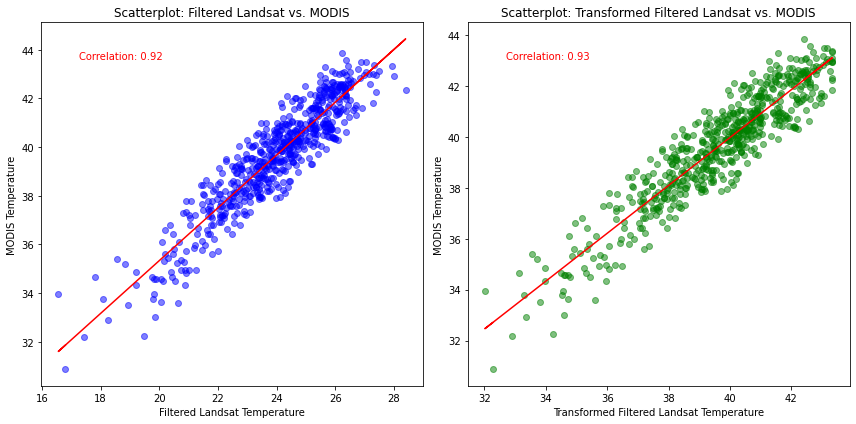

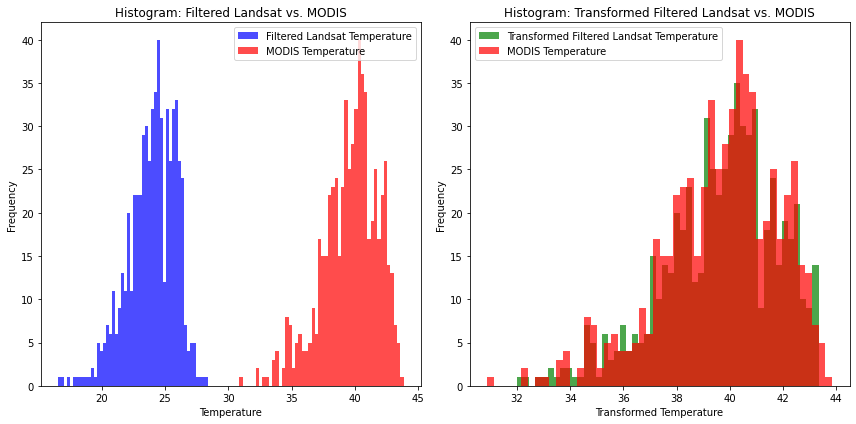

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the Excel file containing both datasets
xls = pd.ExcelFile(r'C:\Users\Redwan Kabir\Desktop\MOD_LAND_LST_Code2.xlsx')

# Load data from different sheets
landsat_data = xls.parse('Landsat')  # Replace 'Landsat_Sheet' with your Landsat sheet name
modis_lst_data = xls.parse('MODIS')  # Replace 'MODIS_Sheet' with your MODIS LST sheet name

# Calculate quantiles for both datasets
landsat_quantiles = np.percentile(landsat_data['Temperature'], np.arange(0, 100, 1))
modis_lst_quantiles = np.percentile(modis_lst_data['Temperature'], np.arange(0, 100, 1))

# Perform Q-Q matching
landsat_data['Transformed_Temperature'] = np.interp(landsat_data['Temperature'], landsat_quantiles, modis_lst_quantiles)

# Define a threshold for acceptable match (adjust this value as needed)
threshold = 2.0  # Example threshold value

# Filter out overestimated data points
filtered_data = landsat_data[abs(landsat_data['Transformed_Temperature'] - modis_lst_data['Temperature']) <= threshold]

# Create a DataFrame with original Landsat, transformed Landsat, and MODIS data
combined_data = pd.DataFrame({
    'Landsat Temperature': filtered_data['Temperature'],
    'Transformed Landsat Temperature': filtered_data['Transformed_Temperature'],
    'MODIS LST Temperature': modis_lst_data.loc[filtered_data.index, 'Temperature']
    #'MODIS LST Temperature': filtered_data['Temperature']  # Use MODIS data corresponding to the filtered Landsat data
})

# Save filtered combined data to an Excel file
combined_data.to_excel('filtered_combined_data.xlsx', index=False)

# Create scatterplots with regression lines and correlation values for filtered data
plt.figure(figsize=(12, 6))

# Scatterplot for Filtered Landsat vs. MODIS
plt.subplot(1, 2, 1)
plt.scatter(filtered_data['Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'], alpha=0.5, color='blue')
plt.title('Scatterplot: Filtered Landsat vs. MODIS')
plt.xlabel('Filtered Landsat Temperature')
plt.ylabel('MODIS Temperature')

# Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'])
plt.plot(filtered_data['Temperature'], slope * filtered_data['Temperature'] + intercept, color='red')
plt.text(0.1, 0.9, f'Correlation: {r_value:.2f}', transform=plt.gca().transAxes, color='red')

# Scatterplot for Transformed Filtered Landsat vs. MODIS
plt.subplot(1, 2, 2)
plt.scatter(filtered_data['Transformed_Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'], alpha=0.5, color='green')
plt.title('Scatterplot: Transformed Filtered Landsat vs. MODIS')
plt.xlabel('Transformed Filtered Landsat Temperature')
plt.ylabel('MODIS Temperature')

# Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['Transformed_Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'])
plt.plot(filtered_data['Transformed_Temperature'], slope * filtered_data['Transformed_Temperature'] + intercept, color='red')
plt.text(0.1, 0.9, f'Correlation: {r_value:.2f}', transform=plt.gca().transAxes, color='red')

plt.tight_layout()

# Save scatterplot as an image
#plt.savefig('filtered_scatterplots.png')

# Create histograms for filtered data
plt.figure(figsize=(12, 6))

# Histogram for Filtered Landsat
plt.subplot(1, 2, 1)
plt.hist(filtered_data['Temperature'], bins=50, color='blue', alpha=0.7, label='Filtered Landsat Temperature')
plt.hist(modis_lst_data.loc[filtered_data.index, 'Temperature'], bins=50, color='red', alpha=0.7, label='MODIS Temperature')
plt.title('Histogram: Filtered Landsat vs. MODIS')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Transformed Filtered Landsat
plt.subplot(1, 2, 2)
plt.hist(filtered_data['Transformed_Temperature'], bins=50, color='green', alpha=0.7, label='Transformed Filtered Landsat Temperature')
plt.hist(modis_lst_data.loc[filtered_data.index, 'Temperature'], bins=50, color='red', alpha=0.7, label='MODIS Temperature')
plt.title('Histogram: Transformed Filtered Landsat vs. MODIS')
plt.xlabel('Transformed Temperature')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()

# Show the first few rows of the combined data DataFrame
print(combined_data.head())

# Save histograms as an image
#plt.savefig('filtered_histograms.png')

# Show plots
plt.show()


# 2.2 Data Filter using Z-Score for excluding overestimates and underestimates

Certainly, another approach to remove overestimated data points when comparing Landsat data to MODIS LST data is to use a z-score threshold. This approach identifies data points that fall outside a specified number of standard deviations from the mean difference between the two datasets. 

In this code, a z-score threshold is used to identify and filter out data points where the difference between Landsat and MODIS temperatures exceeds the specified threshold. The filtered data is then used for plotting scatterplots and histograms.

   Landsat Temperature  Transformed Landsat Temperature  MODIS LST Temperature
0             25.79457                        41.691471               43.95001
1             26.21630                        42.421637               43.85001
2             26.36911                        42.596444               43.59000
3             26.87753                        43.053945               43.51001
4             27.05068                        43.156430               43.51001


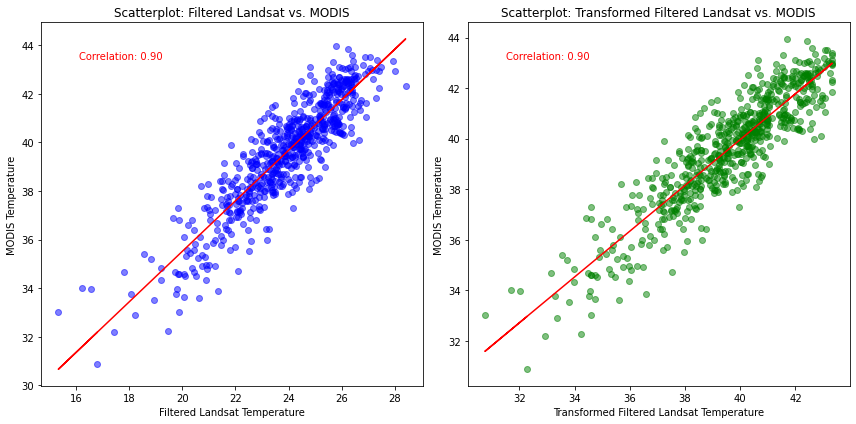

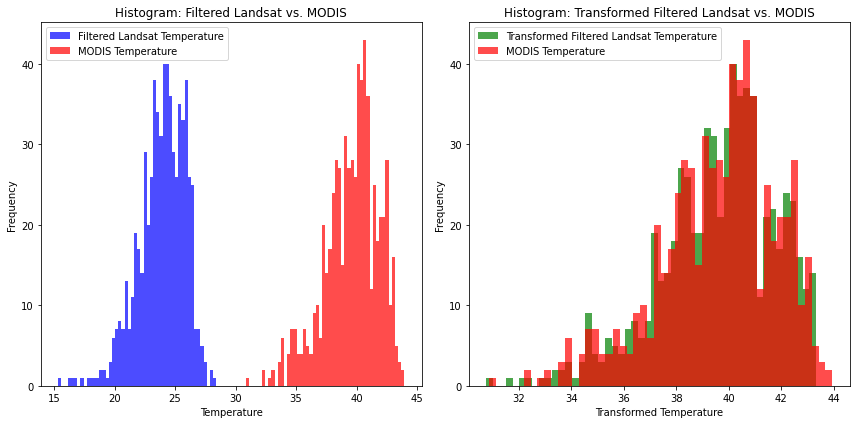

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the Excel file containing both datasets
xls = pd.ExcelFile(r'C:\Users\Redwan Kabir\Desktop\MOD_LAND_LST_Code2.xlsx')

# Load data from different sheets
landsat_data = xls.parse('Landsat')  # Replace 'Landsat_Sheet' with your Landsat sheet name
modis_lst_data = xls.parse('MODIS')  # Replace 'MODIS_Sheet' with your MODIS LST sheet name

# Calculate quantiles for both datasets
landsat_quantiles = np.percentile(landsat_data['Temperature'], np.arange(0, 100, 1))
modis_lst_quantiles = np.percentile(modis_lst_data['Temperature'], np.arange(0, 100, 1))

# Perform Q-Q matching
landsat_data['Transformed_Temperature'] = np.interp(landsat_data['Temperature'], landsat_quantiles, modis_lst_quantiles)

# Calculate the difference between Landsat and MODIS temperatures
difference = landsat_data['Transformed_Temperature'] - modis_lst_data['Temperature']

# Define a z-score threshold (adjust this value as needed)
z_score_threshold = 2.0  # Example threshold value

# Compute the z-score for the difference
z_scores = (difference - difference.mean()) / difference.std()

# Filter out data points with z-scores beyond the threshold
filtered_data = landsat_data[abs(z_scores) <= z_score_threshold]

# Create a DataFrame with original Landsat, transformed Landsat, and MODIS data for filtered data
combined_data = pd.DataFrame({
    'Landsat Temperature': filtered_data['Temperature'],
    'Transformed Landsat Temperature': filtered_data['Transformed_Temperature'],
    'MODIS LST Temperature': modis_lst_data.loc[filtered_data.index, 'Temperature']
})

# Save filtered combined data to an Excel file
combined_data.to_excel('filtered_combined_data_zscore.xlsx', index=False)

# Create scatterplots with regression lines and correlation values for filtered data
plt.figure(figsize=(12, 6))

# Scatterplot for Filtered Landsat vs. MODIS
plt.subplot(1, 2, 1)
plt.scatter(filtered_data['Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'], alpha=0.5, color='blue')
plt.title('Scatterplot: Filtered Landsat vs. MODIS')
plt.xlabel('Filtered Landsat Temperature')
plt.ylabel('MODIS Temperature')

# Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'])
plt.plot(filtered_data['Temperature'], slope * filtered_data['Temperature'] + intercept, color='red')
plt.text(0.1, 0.9, f'Correlation: {r_value:.2f}', transform=plt.gca().transAxes, color='red')

# Scatterplot for Transformed Filtered Landsat vs. MODIS
plt.subplot(1, 2, 2)
plt.scatter(filtered_data['Transformed_Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'], alpha=0.5, color='green')
plt.title('Scatterplot: Transformed Filtered Landsat vs. MODIS')
plt.xlabel('Transformed Filtered Landsat Temperature')
plt.ylabel('MODIS Temperature')

# Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(filtered_data['Transformed_Temperature'], modis_lst_data.loc[filtered_data.index, 'Temperature'])
plt.plot(filtered_data['Transformed_Temperature'], slope * filtered_data['Transformed_Temperature'] + intercept, color='red')
plt.text(0.1, 0.9, f'Correlation: {r_value:.2f}', transform=plt.gca().transAxes, color='red')

plt.tight_layout()

# Save scatterplot as an image
#plt.savefig('filtered_scatterplots_zscore.png')

# Create histograms for filtered data
plt.figure(figsize=(12, 6))

# Histogram for Filtered Landsat
plt.subplot(1, 2, 1)
plt.hist(filtered_data['Temperature'], bins=50, color='blue', alpha=0.7, label='Filtered Landsat Temperature')
plt.hist(modis_lst_data.loc[filtered_data.index, 'Temperature'], bins=50, color='red', alpha=0.7, label='MODIS Temperature')
plt.title('Histogram: Filtered Landsat vs. MODIS')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Transformed Filtered Landsat
plt.subplot(1, 2, 2)
plt.hist(filtered_data['Transformed_Temperature'], bins=50, color='green', alpha=0.7, label='Transformed Filtered Landsat Temperature')
plt.hist(modis_lst_data.loc[filtered_data.index, 'Temperature'], bins=50, color='red', alpha=0.7, label='MODIS Temperature')
plt.title('Histogram: Transformed Filtered Landsat vs. MODIS')
plt.xlabel('Transformed Temperature')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()

# Show the first few rows of the combined data DataFrame
print(combined_data.head())

# Save histograms as an image
#plt.savefig('filtered_histograms_zscore.png')

# Show plots
plt.show()


# 2.3 Summary Statistics for Transformation and Original Value comparison

This code calculates summary statistics manually for each of the three columns and organizes them into a DataFrame named statistics_df. The DataFrame is then transposed for a more readable format. Finally, it displays the statistics in the DataFrame.

In [29]:
import numpy as np
import pandas as pd

# Load the filtered combined data from the Excel file
filtered_combined_data = pd.read_excel('filtered_combined_data_zscore.xlsx')

# Calculate summary statistics manually for each column
landsat_stats = {
    'Mean': filtered_combined_data['Landsat Temperature'].mean(),
    'Standard Deviation': filtered_combined_data['Landsat Temperature'].std(),
    'Minimum': filtered_combined_data['Landsat Temperature'].min(),
    '25th Percentile': np.percentile(filtered_combined_data['Landsat Temperature'], 25),
    'Median (50th Percentile)': np.percentile(filtered_combined_data['Landsat Temperature'], 50),
    '75th Percentile': np.percentile(filtered_combined_data['Landsat Temperature'], 75),
    'Maximum': filtered_combined_data['Landsat Temperature'].max(),
}

transformed_stats = {
    'Mean': filtered_combined_data['Transformed Landsat Temperature'].mean(),
    'Standard Deviation': filtered_combined_data['Transformed Landsat Temperature'].std(),
    'Minimum': filtered_combined_data['Transformed Landsat Temperature'].min(),
    '25th Percentile': np.percentile(filtered_combined_data['Transformed Landsat Temperature'], 25),
    'Median (50th Percentile)': np.percentile(filtered_combined_data['Transformed Landsat Temperature'], 50),
    '75th Percentile': np.percentile(filtered_combined_data['Transformed Landsat Temperature'], 75),
    'Maximum': filtered_combined_data['Transformed Landsat Temperature'].max(),
}

modis_stats = {
    'Mean': filtered_combined_data['MODIS LST Temperature'].mean(),
    'Standard Deviation': filtered_combined_data['MODIS LST Temperature'].std(),
    'Minimum': filtered_combined_data['MODIS LST Temperature'].min(),
    '25th Percentile': np.percentile(filtered_combined_data['MODIS LST Temperature'], 25),
    'Median (50th Percentile)': np.percentile(filtered_combined_data['MODIS LST Temperature'], 50),
    '75th Percentile': np.percentile(filtered_combined_data['MODIS LST Temperature'], 75),
    'Maximum': filtered_combined_data['MODIS LST Temperature'].max(),
}

# Organize statistics into a DataFrame
statistics_df = pd.DataFrame({
    'Landsat Temperature': pd.Series(landsat_stats),
    'Transformed Landsat Temperature': pd.Series(transformed_stats),
    'MODIS LST Temperature': pd.Series(modis_stats),
})


# Display the statistics DataFrame
print(statistics_df)


                          Landsat Temperature  \
Mean                                23.911639   
Standard Deviation                   1.933810   
Minimum                             15.341380   
25th Percentile                     22.792930   
Median (50th Percentile)            24.143600   
75th Percentile                     25.372060   
Maximum                             28.402410   

                          Transformed Landsat Temperature  \
Mean                                            39.576463   
Standard Deviation                               2.224954   
Minimum                                         30.750000   
25th Percentile                                 38.236974   
Median (50th Percentile)                        39.926099   
75th Percentile                                 41.032687   
Maximum                                         43.330991   

                          MODIS LST Temperature  
Mean                                  39.583119  
Standard Deviation

# 2.4 Final Visualization for Data Transformation and Original Value comparison for Sumamry Statistics (Filtered Data)

This code calculates summary statistics, displays them in a DataFrame, and visualizes them using bar charts, box plots, and histograms for each of the columns: Landsat Temperature, Transformed Landsat Temperature, and MODIS LST Temperature. You can adjust the parameters of the visualizations as needed.

Summary Statistics:
                                      Mean  Standard Deviation   Minimum  \
Landsat Temperature              23.911639            1.933810  15.34138   
Transformed Landsat Temperature  39.576463            2.224954  30.75000   
MODIS LST Temperature            39.583119            2.243893  30.87000   

                                 25th Percentile  Median (50th Percentile)  \
Landsat Temperature                    22.792930                 24.143600   
Transformed Landsat Temperature        38.236974                 39.926099   
MODIS LST Temperature                  38.250000                 39.929990   

                                 75th Percentile    Maximum  
Landsat Temperature                    25.372060  28.402410  
Transformed Landsat Temperature        41.032687  43.330991  
MODIS LST Temperature                  41.049990  43.950010  


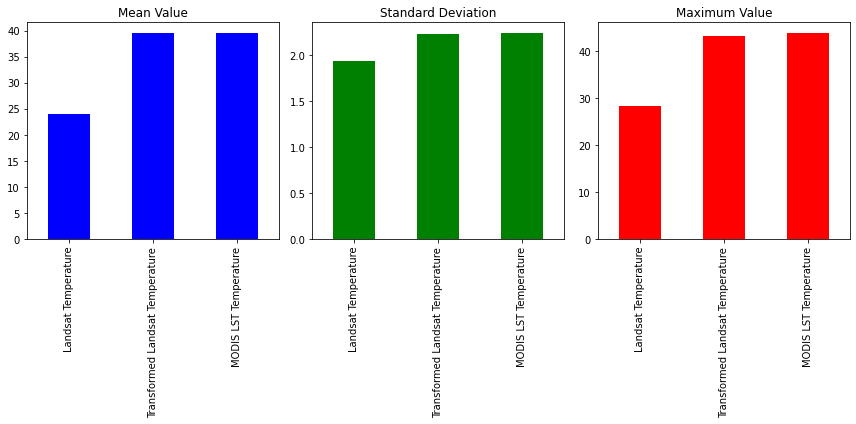

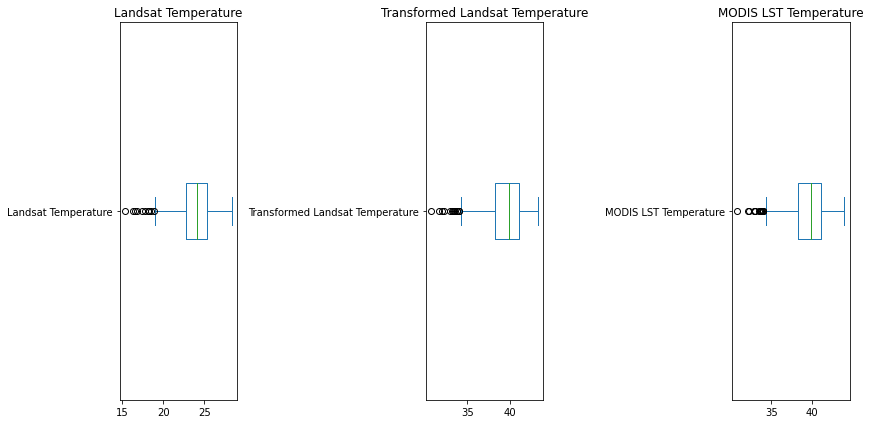

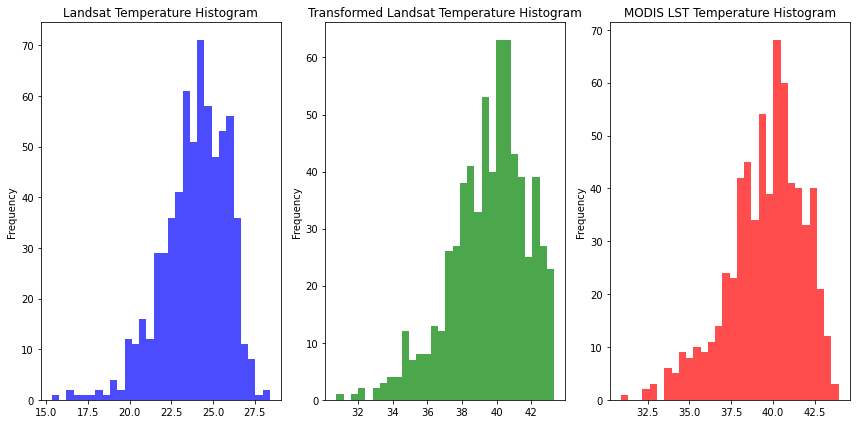

   Landsat Temperature  Transformed Landsat Temperature  MODIS LST Temperature
0             25.79457                        41.691471               43.95001
1             26.21630                        42.421637               43.85001
2             26.36911                        42.596444               43.59000
3             26.87753                        43.053945               43.51001
4             27.05068                        43.156430               43.51001


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered combined data from the Excel file
filtered_combined_data = pd.read_excel('filtered_combined_data_zscore.xlsx')

# Calculate summary statistics manually for each column
landsat_stats = {
    'Mean': filtered_combined_data['Landsat Temperature'].mean(),
    'Standard Deviation': filtered_combined_data['Landsat Temperature'].std(),
    'Minimum': filtered_combined_data['Landsat Temperature'].min(),
    '25th Percentile': np.percentile(filtered_combined_data['Landsat Temperature'], 25),
    'Median (50th Percentile)': np.percentile(filtered_combined_data['Landsat Temperature'], 50),
    '75th Percentile': np.percentile(filtered_combined_data['Landsat Temperature'], 75),
    'Maximum': filtered_combined_data['Landsat Temperature'].max(),
}

transformed_stats = {
    'Mean': filtered_combined_data['Transformed Landsat Temperature'].mean(),
    'Standard Deviation': filtered_combined_data['Transformed Landsat Temperature'].std(),
    'Minimum': filtered_combined_data['Transformed Landsat Temperature'].min(),
    '25th Percentile': np.percentile(filtered_combined_data['Transformed Landsat Temperature'], 25),
    'Median (50th Percentile)': np.percentile(filtered_combined_data['Transformed Landsat Temperature'], 50),
    '75th Percentile': np.percentile(filtered_combined_data['Transformed Landsat Temperature'], 75),
    'Maximum': filtered_combined_data['Transformed Landsat Temperature'].max(),
}

modis_stats = {
    'Mean': filtered_combined_data['MODIS LST Temperature'].mean(),
    'Standard Deviation': filtered_combined_data['MODIS LST Temperature'].std(),
    'Minimum': filtered_combined_data['MODIS LST Temperature'].min(),
    '25th Percentile': np.percentile(filtered_combined_data['MODIS LST Temperature'], 25),
    'Median (50th Percentile)': np.percentile(filtered_combined_data['MODIS LST Temperature'], 50),
    '75th Percentile': np.percentile(filtered_combined_data['MODIS LST Temperature'], 75),
    'Maximum': filtered_combined_data['MODIS LST Temperature'].max(),
}

# Organize statistics into a DataFrame
statistics_df = pd.DataFrame({
    'Landsat Temperature': pd.Series(landsat_stats),
    'Transformed Landsat Temperature': pd.Series(transformed_stats),
    'MODIS LST Temperature': pd.Series(modis_stats),
})

# Transpose the DataFrame for a more readable format
statistics_df = statistics_df.transpose()

# Display the statistics DataFrame
print("Summary Statistics:")
print(statistics_df)

# Create a bar chart for the summary statistics
plt.figure(figsize=(12, 6))

# Plot mean values
plt.subplot(1, 3, 1)
statistics_df['Mean'].plot(kind='bar', color='blue')
plt.title('Mean Value')

# Plot standard deviation values
plt.subplot(1, 3, 2)
statistics_df['Standard Deviation'].plot(kind='bar', color='green')
plt.title('Standard Deviation')

# Plot maximum values
plt.subplot(1, 3, 3)
statistics_df['Maximum'].plot(kind='bar', color='red')
plt.title('Maximum Value')

plt.tight_layout()
plt.show()

# Create a box plot for each column
plt.figure(figsize=(12, 6))

# Box plot for Landsat Temperature
plt.subplot(1, 3, 1)
filtered_combined_data['Landsat Temperature'].plot(kind='box', vert=False)
plt.title('Landsat Temperature')

# Box plot for Transformed Landsat Temperature
plt.subplot(1, 3, 2)
filtered_combined_data['Transformed Landsat Temperature'].plot(kind='box', vert=False)
plt.title('Transformed Landsat Temperature')

# Box plot for MODIS LST Temperature
plt.subplot(1, 3, 3)
filtered_combined_data['MODIS LST Temperature'].plot(kind='box', vert=False)
plt.title('MODIS LST Temperature')

plt.tight_layout()
plt.show()

# Create histograms for each column
plt.figure(figsize=(12, 6))

# Histogram for Landsat Temperature
plt.subplot(1, 3, 1)
filtered_combined_data['Landsat Temperature'].plot(kind='hist', bins=30, color='blue', alpha=0.7)
plt.title('Landsat Temperature Histogram')

# Histogram for Transformed Landsat Temperature
plt.subplot(1, 3, 2)
filtered_combined_data['Transformed Landsat Temperature'].plot(kind='hist', bins=30, color='green', alpha=0.7)
plt.title('Transformed Landsat Temperature Histogram')

# Histogram for MODIS LST Temperature
plt.subplot(1, 3, 3)
filtered_combined_data['MODIS LST Temperature'].plot(kind='hist', bins=30, color='red', alpha=0.7)
plt.title('MODIS LST Temperature Histogram')

plt.tight_layout()
plt.show()

# Show the first few rows of the combined data DataFrame
print(filtered_combined_data.head())


Con(IsNull("Landsat_LST"), "Landsat_LST",
    ("MODIS_LST_Q1" + (("Landsat_LST" - "Landsat_Q1") / ("Landsat_Q3" - "Landsat_Q1")) * ("MODIS_LST_Q3" - "MODIS_LST_Q1")))
